In [1]:
cd

/Users/seanyu


In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

In [3]:
cd Downloads

/Users/seanyu/Downloads


In [4]:
GE = pd.read_csv('GE.csv',index_col = 'Date',parse_dates = ['Date'])

In [5]:
GE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-11,11.40,11.50,11.24,11.35,11.292844,45575600
2019-11-12,11.32,11.58,11.29,11.42,11.362492,48942900
2019-11-13,11.29,11.36,11.18,11.29,11.233147,53981300
2019-11-14,11.18,11.35,11.18,11.29,11.233147,30790600
2019-11-15,11.34,11.55,11.33,11.52,11.461989,38236200
...,...,...,...,...,...,...
2020-11-03,7.65,7.92,7.54,7.85,7.850000,97872500
2020-11-04,7.69,8.02,7.53,7.85,7.850000,126925100
2020-11-05,7.95,8.05,7.91,7.99,7.990000,85806800


In [6]:
GE.index = pd.to_datetime(GE.index)

In [7]:
GE.index

DatetimeIndex(['2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22',
               ...
               '2020-10-27', '2020-10-28', '2020-10-29', '2020-10-30',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [8]:
sub = GE['2019-11':'2020-11']['Close']

In [10]:
sub

Date
2019-11-11    11.35
2019-11-12    11.42
2019-11-13    11.29
2019-11-14    11.29
2019-11-15    11.52
              ...  
2020-11-03     7.85
2020-11-04     7.85
2020-11-05     7.99
2020-11-06     8.09
2020-11-09     8.72
Name: Close, Length: 252, dtype: float64

In [13]:
train=sub['2019-11':'2020-08']

In [14]:
train

Date
2019-11-11    11.35
2019-11-12    11.42
2019-11-13    11.29
2019-11-14    11.29
2019-11-15    11.52
              ...  
2020-08-25     6.59
2020-08-26     6.48
2020-08-27     6.48
2020-08-28     6.61
2020-08-31     6.34
Name: Close, Length: 203, dtype: float64

In [15]:
test=sub['2020-09':'2020-11']

In [16]:
test

Date
2020-09-01    6.19
2020-09-02    6.44
2020-09-03    6.32
2020-09-04    6.42
2020-09-08    6.14
2020-09-09    6.16
2020-09-10    6.00
2020-09-11    5.95
2020-09-14    6.15
2020-09-15    6.10
2020-09-16    6.75
2020-09-17    7.05
2020-09-18    6.88
2020-09-21    6.35
2020-09-22    6.25
2020-09-23    6.11
2020-09-24    6.06
2020-09-25    6.11
2020-09-28    6.20
2020-09-29    6.12
2020-09-30    6.23
2020-10-01    6.24
2020-10-02    6.39
2020-10-05    6.41
2020-10-06    6.17
2020-10-07    6.31
2020-10-08    6.65
2020-10-09    6.84
2020-10-12    6.83
2020-10-13    6.72
2020-10-14    6.82
2020-10-15    6.87
2020-10-16    7.29
2020-10-19    7.29
2020-10-20    7.34
2020-10-21    7.32
2020-10-22    7.72
2020-10-23    7.63
2020-10-26    7.38
2020-10-27    7.10
2020-10-28    7.42
2020-10-29    7.37
2020-10-30    7.42
2020-11-02    7.52
2020-11-03    7.85
2020-11-04    7.85
2020-11-05    7.99
2020-11-06    8.09
2020-11-09    8.72
Name: Close, dtype: float64

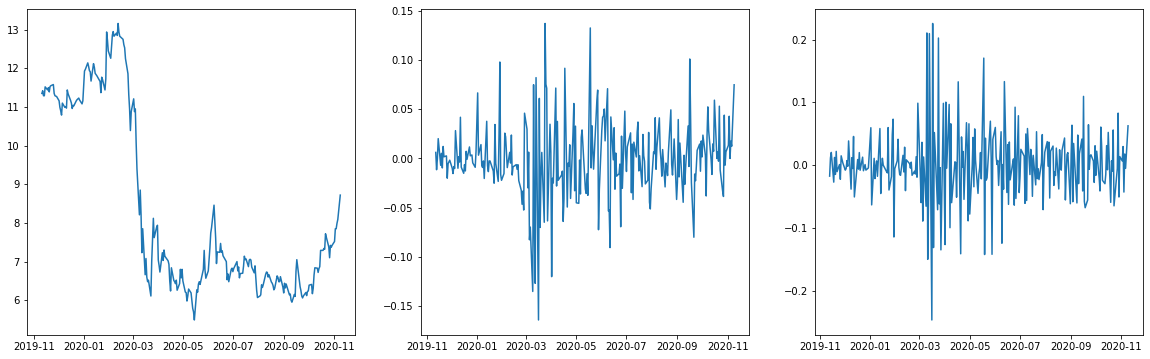

In [28]:
GE['Close_diff_1'] = np.log(GE['Close']).diff(1)
GE['Close_diff_2'] = GE['Close_diff_1'].diff(1)
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(GE['Close'])
ax2 = fig.add_subplot(132)
ax2.plot(GE['Close_diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(GE['Close_diff_2'])
plt.show()

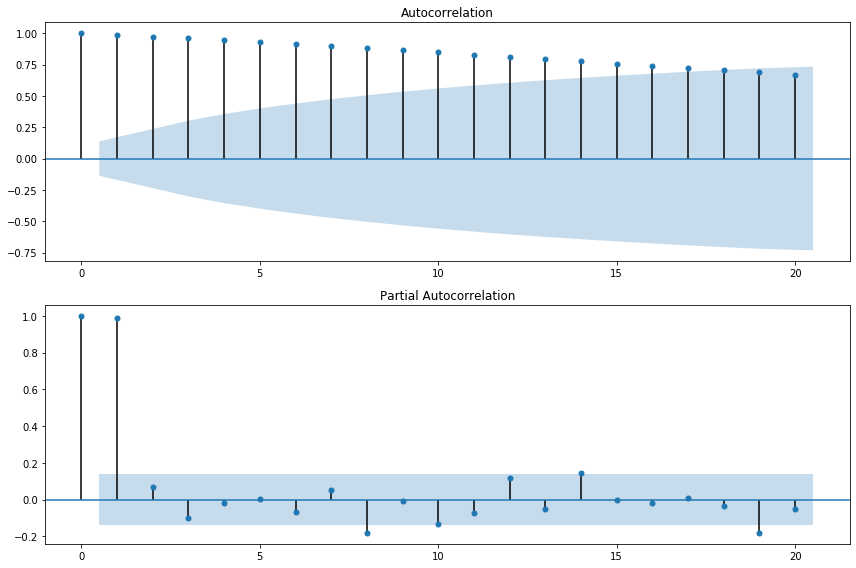

In [30]:
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

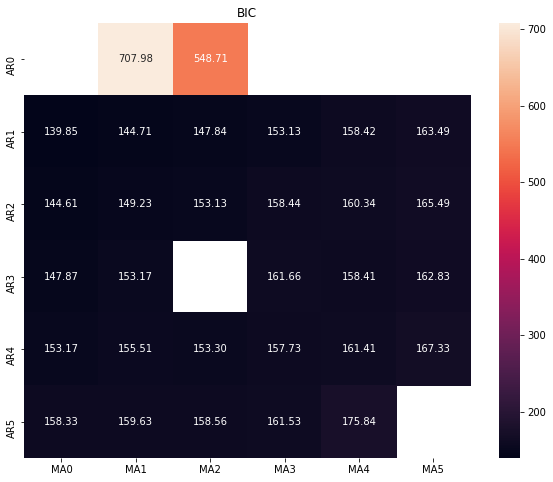

In [36]:
import itertools
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [37]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

AIC (5, 4)
BIC (1, 0)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<Figure size 864x576 with 0 Axes>

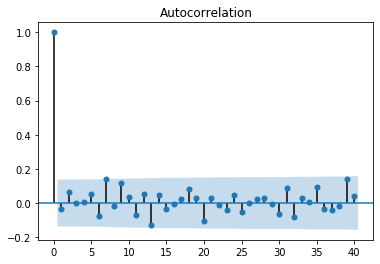

In [38]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2019-12-02    11.214025
2019-12-03    11.149833
2019-12-04    10.954545
2019-12-05    10.864752
2019-12-06    10.762899
                ...    
2020-05-26     6.464572
2020-05-27     6.717528
2020-05-28     7.407703
2020-05-29     6.806982
2020-06-01     6.686554
Length: 125, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


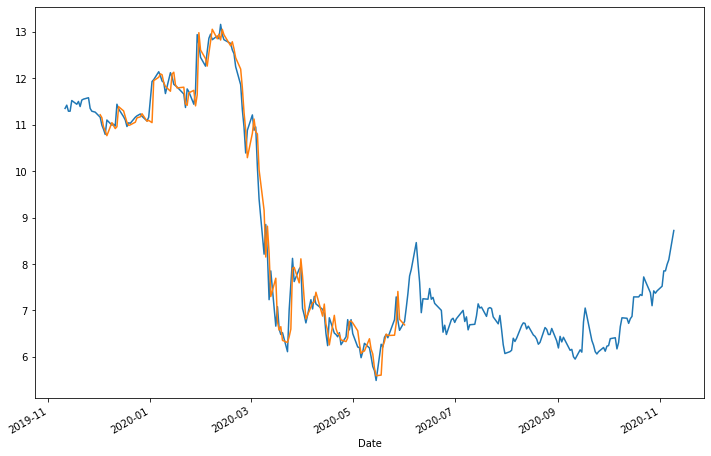

In [46]:
model = sm.tsa.ARIMA(sub, order=(17, 0, 2))
results = model.fit()
predict_sunspots = results.predict(start=str('2019-12'),end=str('2020-06'),dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [58]:
results.forecast()[0]

array([8.75398171])